# Exploring Data

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

### Import Data

In [5]:
df = pd.read_csv("data/customer.csv")
print("df type:", type(df))
print("df shape: ", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape:  (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


Subsetting Data

 - The project focuses on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

In [7]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape: ", df_fear.shape)
df_fear.head()

df_fear shape:  (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


### Explore

Age Groups

- The aim is to  create a list age_groups with the unique values in the "AGECL" column

In [8]:
df_fear["AGECL"].nunique()

6

In [10]:
age_groups=df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Age Groups as per the data dictionary: 

- 1 : AGE < 35
- 2 : AGE 35 - 44
- 3 : AGE 45 -54
- 4 : AGE 55 - 64
- 5 : AGE 65 - 74
- 6 : AGE >= 75

Replace Age Groups:

- Next step is to create a version of this column that uses the actual group names.

In [13]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

Age Group Bar Chart

- Goal is to create a bar chart showing the value counts from age_cl.

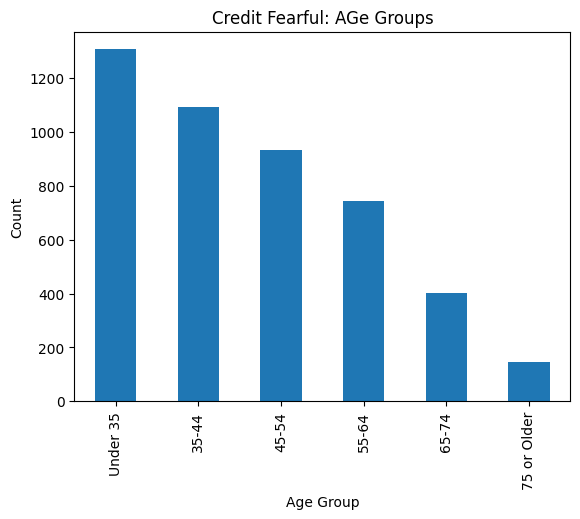

In [14]:
age_cl_value_counts = age_cl.value_counts()

age_cl_value_counts.plot(
    kind = "bar",
    xlabel="Age Group",
    ylabel="Count",
    title="Credit Fearful: AGe Groups"
);
